In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ufc-fighters-statistics.csv')
df.head(20)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
5,Gerald Strebendt,The Finishing Machine,9,7,0,175.26,70.31,NaN,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4
6,Isaiah Hill,NaN,5,7,1,177.80,70.31,NaN,NaN,NaN,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5
7,Kenneth Seegrist,NaN,4,7,0,182.88,83.91,NaN,Orthodox,NaN,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4
8,Will Kerr,NaN,9,3,0,177.80,70.31,175.26,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3
9,Neil Grove,Goliath,12,8,1,198.12,120.20,NaN,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [4]:
df.isna().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

Converting & dropping Columns with relevance

In [5]:
df.drop(columns='nickname',inplace=True)

In [6]:
from datetime import datetime



In [7]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],errors='coerce')

In [8]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['date_of_birth'].dt.year

Filling  Na Values with Median Data for Futher Anlalysis

In [9]:
df['height_cm'].fillna(df['height_cm'].median(), inplace=True)
df['weight_in_kg'].fillna(df['weight_in_kg'].median(), inplace=True)


In [10]:
df['reach_in_cm'].fillna(df['reach_in_cm'].median(), inplace=True)


In [11]:
df['stance'].fillna('Unknown', inplace=True)


In [12]:
df.head(10)

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,age
0,Robert Drysdale,7,0,0,190.50,92.99,182.88,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,44.0
1,Daniel McWilliams,15,37,0,185.42,83.91,182.88,Unknown,NaT,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,NaN
2,Dan Molina,13,9,0,177.80,97.98,182.88,Unknown,NaT,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,NaN
3,Paul Ruiz,7,4,0,167.64,61.23,182.88,Unknown,NaT,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,NaN
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,31.0
5,Gerald Strebendt,9,7,0,175.26,70.31,182.88,Orthodox,1979-03-01,0.00,0.0,4.00,38.0,0.00,0.0,0.0,16.4,46.0
6,Isaiah Hill,5,7,1,177.80,70.31,182.88,Unknown,NaT,4.84,50.0,0.97,80.0,0.00,0.0,66.0,14.5,NaN
7,Kenneth Seegrist,4,7,0,182.88,83.91,182.88,Orthodox,NaT,3.21,66.0,1.28,0.0,0.00,0.0,40.0,14.4,NaN
8,Will Kerr,9,3,0,177.80,70.31,175.26,Orthodox,1982-10-21,1.91,42.0,6.22,33.0,0.00,0.0,0.0,14.3,43.0
9,Neil Grove,12,8,1,198.12,120.20,182.88,Orthodox,1971-01-18,0.00,0.0,0.00,0.0,0.00,0.0,100.0,14.3,54.0


Creating Weight with bins to Categorize Fighters

In [13]:
df['weight_bin'] = pd.cut(df['weight_in_kg'], 
                          bins=[0, 60, 70, 80, 90, 100, 120, 150], 
                          labels=['<60', '60-70', '70-80', '80-90', '90-100', '100-120', '120+'])

In [14]:
df['age'] = df.groupby('weight_bin')['age'].transform(lambda x: x.fillna(x.median()))


In [15]:
df['age'] = df.groupby('stance')['age'].transform(lambda x: x.fillna(x.median()))


In [16]:
df['age'].fillna(df['age'].median(), inplace=True)


In [17]:
df.drop(columns=['date_of_birth', 'weight_bin'], inplace=True)


Finalizing numeric value columns

In [18]:
cols = [
    'wins', 'losses', 'draws', 
    'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 
    'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 
    'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 
    'takedown_defense', 'average_submissions_attempted_per_15_minutes'
]

In [19]:
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [20]:
print("Cleaning complete. Null values remaining:")
print(df.isnull().sum())

Cleaning complete. Null values remaining:
name                                            0
wins                                            0
losses                                          0
draws                                           0
height_cm                                       0
weight_in_kg                                    0
reach_in_cm                                     0
stance                                          0
significant_strikes_landed_per_minute           0
significant_striking_accuracy                   0
significant_strikes_absorbed_per_minute         0
significant_strike_defence                      0
average_takedowns_landed_per_15_minutes         0
takedown_accuracy                               0
takedown_defense                                0
average_submissions_attempted_per_15_minutes    0
age                                             0
dtype: int64


In [21]:
df.duplicated().sum()

0

The Above Data is Completely Clean and Ready For EDA

In [22]:
df.to_csv("mma_fighter_cleaned.csv", index=False)


In [23]:
print('Dataset Shape:', df.shape)


Dataset Shape: (4111, 17)


In [24]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,age
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.202841,77.389776,182.310956,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095,39.663099
std,9.374667,5.103768,0.822373,8.560509,17.790948,7.802461,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924,6.801655
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,180.340000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000,39.000000
75%,17.000000,8.000000,0.000000,182.880000,83.910000,182.880000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000,44.000000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000,82.000000


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Age Distribution

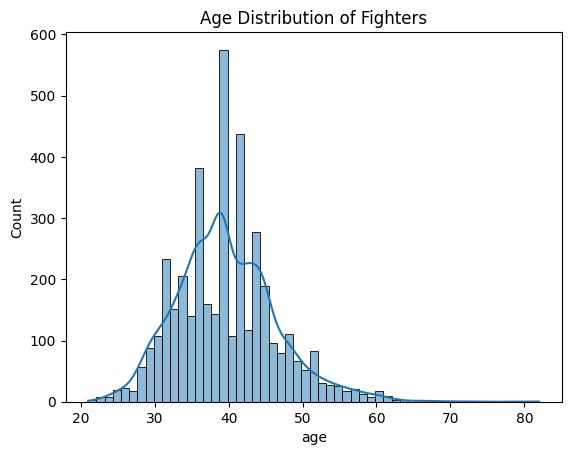

In [26]:
sns.histplot(data=df['age'],kde=True)
plt.title("Age Distribution of Fighters")
plt.show()

The above Graph shows that most of the fighters are of group age from 30 to 45

WINS Distiribution

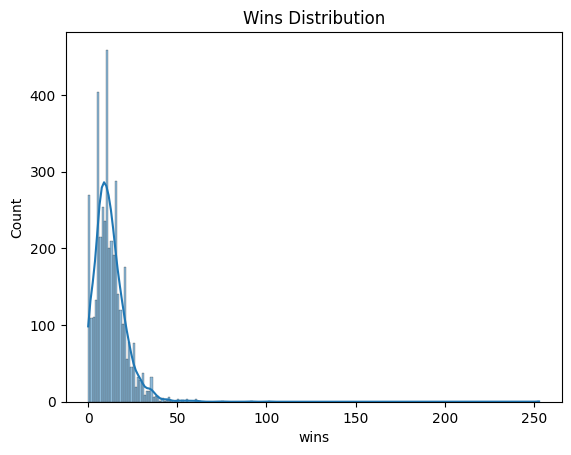

In [27]:
sns.histplot(data=df['wins'],kde=True)
plt.title("Wins Distribution")
plt.show()

Height vs Reach

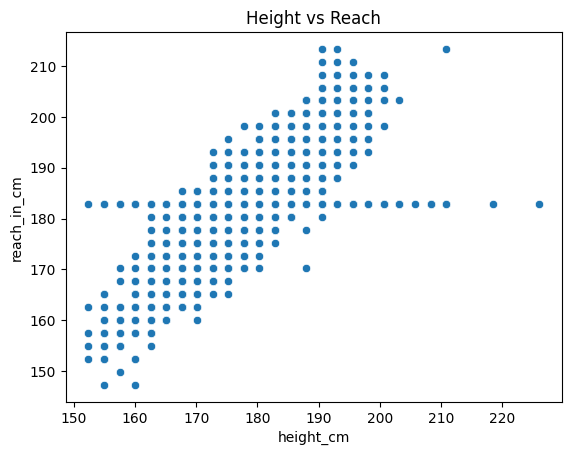

In [28]:
sns.scatterplot(x='height_cm', y='reach_in_cm', data=df)
plt.title("Height vs Reach")
plt.show()

Correlation Heatmap

In [31]:
numerical_col = df.select_dtypes(include='number')

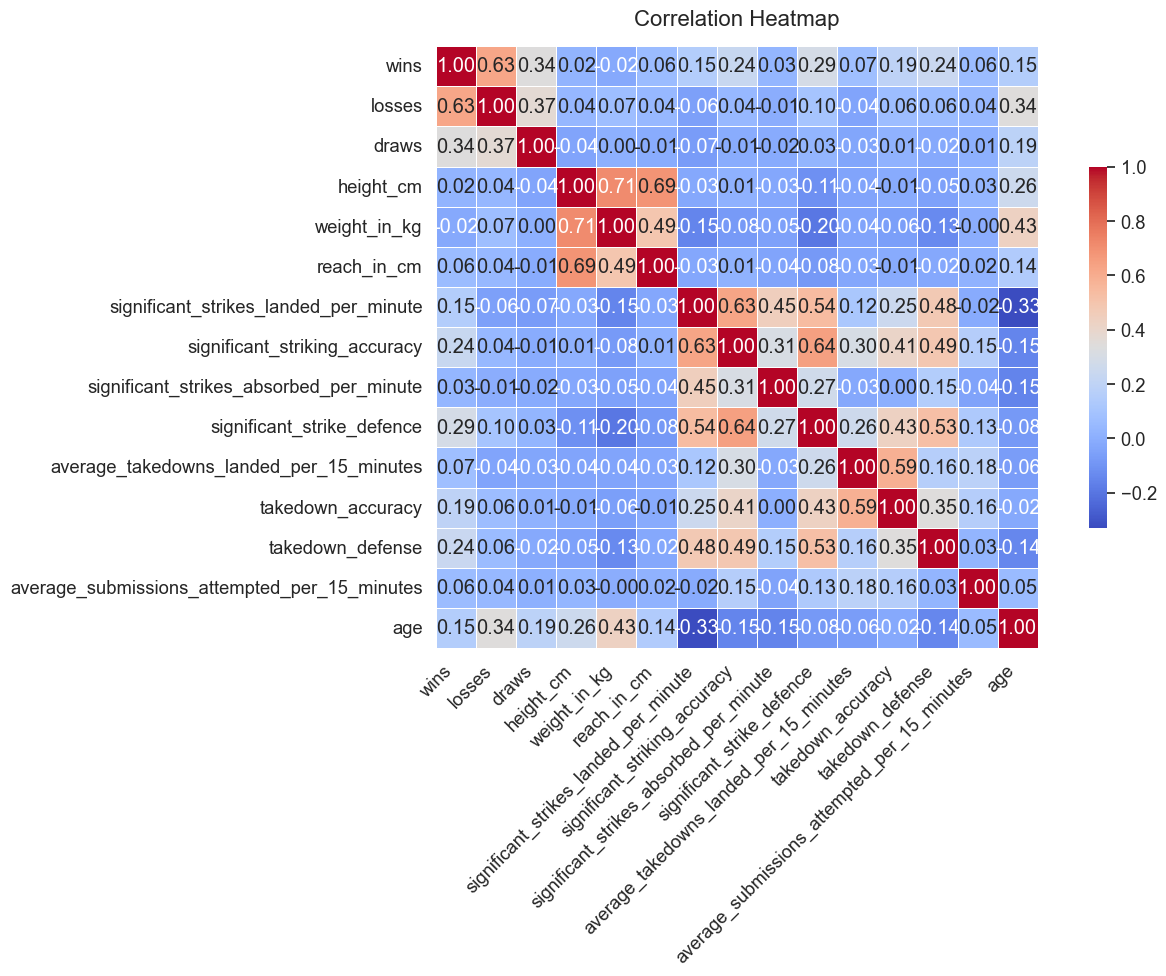

In [32]:


plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)

# Plot heatmap
sns.heatmap(
    numerical_col.corr(), 
    annot=True, 
    cmap='coolwarm',
    fmt=".2f", 
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.6}
)

plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Grouped Analysis
stance vs Win Average

In [33]:
stance_avg_wins = df.groupby('stance')['wins'].mean().sort_values(ascending=False)
stance_avg_wins

stance
Open Stance    15.285714
Southpaw       14.626786
Orthodox       13.426762
Switch         11.484375
Unknown         7.794654
Sideways        2.000000
Name: wins, dtype: float64

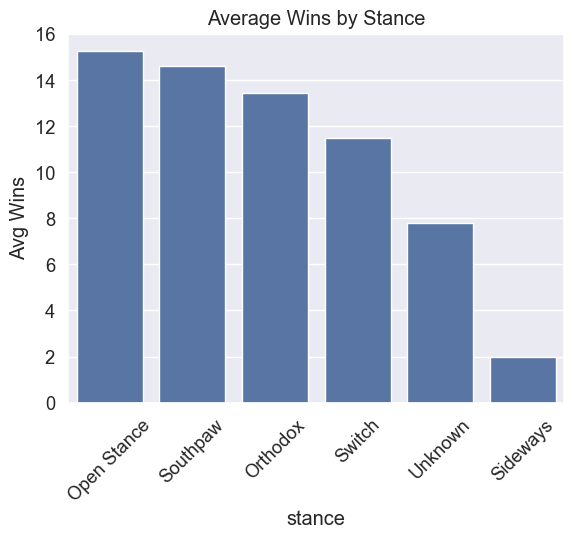

In [34]:
sns.barplot(x=stance_avg_wins.index, y=stance_avg_wins.values)
plt.title("Average Wins by Stance")
plt.ylabel("Avg Wins")
plt.xticks(rotation=45)
plt.show()

The Above graph shows that fighters with open stance wins the most

 Weight category vs Performance

In [35]:
df['weight_bin'] = pd.cut(df['weight_in_kg'], bins=[0, 60, 70, 80, 90, 100, 120, 150],
                          labels=['<60', '60-70', '70-80', '80-90', '90-100', '100-120', '120+'])

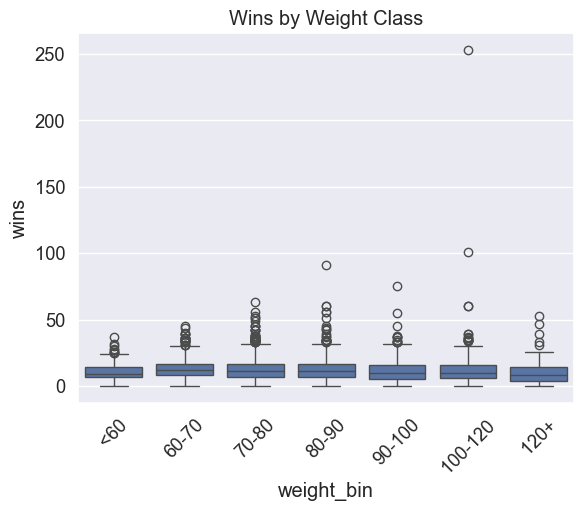

In [36]:
sns.boxplot(x='weight_bin', y='wins', data=df)
plt.title("Wins by Weight Class")
plt.xticks(rotation=45)
plt.show()

T-test: Do fighters with higher striking accuracy win significantly more?

In [37]:
median_accuracy = df['significant_striking_accuracy'].median()
high_acc = df[df['significant_striking_accuracy'] > median_accuracy]['wins']
low_acc = df[df['significant_striking_accuracy'] <= median_accuracy]['wins']


In [39]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(high_acc, low_acc, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-statistic: 10.28, P-value: 0.0000


In [40]:
if p_val < 0.05:
    print(" Result: Significant difference in wins between high and low accuracy fighters.")
else:
    print(" Result: No significant difference.")

 Result: Significant difference in wins between high and low accuracy fighters.


Fighter Style Classification (Simple Rule-Based)

In [41]:
def classify_fighters(row):
    striking = row['significant_strikes_landed_per_minute'] + row['significant_striking_accuracy']
    grappling = row['average_takedowns_landed_per_15_minutes'] + row['average_submissions_attempted_per_15_minutes']


    if striking > grappling + 5:
        return 'Striker'
    elif grappling > striking + 5:
        return 'Grappler'
    else:
        return 'Balanced'

In [42]:
df['fighter_type'] = df.apply(classify_fighters, axis=1)
df['fighter_type'].value_counts()

fighter_type
Striker     3336
Balanced     758
Grappler      17
Name: count, dtype: int64

The Majority of fighters are Strikers and least one are Grappler

Radar Chart for One Fighter

In [45]:
import numpy as np

def plot_fighter_radar(fighter_name):
    fighter = df[df['name'] == fighter_name].iloc[0]
    stats = [
        'significant_strikes_landed_per_minute',
        'significant_striking_accuracy',
        'significant_strikes_absorbed_per_minute',
        'significant_strike_defence',
        'average_takedowns_landed_per_15_minutes',
        'takedown_accuracy',
        'takedown_defense',
        'average_submissions_attempted_per_15_minutes'
    ]
    
    values = fighter[stats].fillna(0).values
    labels = stats
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.title(f"{fighter['name']} - {fighter['fighter_type']}")
    plt.show()



The Below code was used to make an html EDA Report


In [ ]:
# from ydata_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df, title='MMAFighters Statistical EDA Report',explorative=True)
# profile.to_file('MMA_Fighter_EDA_Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]


Basic Prediction Model

In [53]:
df['high_performer'] = df['wins'].apply(lambda x: 1 if x >= 10 else 0)

Preparing Data For Modeling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
features = [
    'height_cm', 'weight_in_kg', 'reach_in_cm', 'age',
    'significant_strikes_landed_per_minute', 'significant_striking_accuracy',
    'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
    'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
    'takedown_defense', 'average_submissions_attempted_per_15_minutes'
]

In [56]:
X = df[features]
y = df['high_performer']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the Random forest model

In [58]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[196 130]
 [119 378]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       326
           1       0.74      0.76      0.75       497

    accuracy                           0.70       823
   macro avg       0.68      0.68      0.68       823
weighted avg       0.70      0.70      0.70       823



Features importance

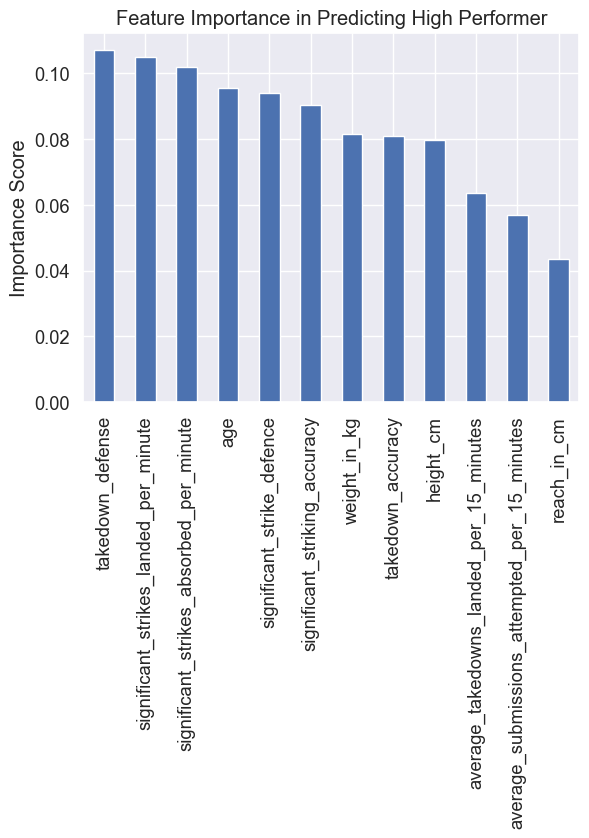

In [60]:
feat_importance = pd.Series(model.feature_importances_, index=features)
feat_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance in Predicting High Performer")
plt.ylabel("Importance Score")
plt.show()

In [61]:
import joblib
joblib.dump(model,'fighter_performance_model.pkl')

['fighter_performance_model.pkl']